# Regression

## Intro

In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import quandl
import math
import datetime
import mpld3
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm


In [2]:
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df =df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume',]]

df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100.0

df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100.0

# Adj. Close is more related to price. It's a crucial coloumn.
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]

df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [5]:
df.head(10)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


## Features and Labels

In [6]:
forecast_col = 'Adj. Close'
# In machine learning we can't work with not a number values.
# Replacing not a number values with -99999
df.fillna(-99999, inplace=True)
df


,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [7]:
forecast_out = int(math.ceil(0.01*len(df)))
forecast_out


35

In [8]:
len(df)

3424

In [9]:
"""Shifting the Feature data for Evaluation the Prediction"""
# After shifting the dataframe the label of the last values will be NaN.
df['label'] = df[forecast_col].shift(-forecast_out)

df.shape

(3424, 5)

In [10]:
df

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0,NaN


## Training and Testing

In [11]:
X = np.array(df.drop(['label'], 1))
print('X = ', X)
print(X.shape)

X =  [[ 5.03228418e+01  3.71256291e+00  3.24967503e-01  4.46590000e+07]
 [ 5.43226889e+01  7.10922353e-01  7.22700723e+00  2.28343000e+07]
 [ 5.48693765e+01  3.72943327e+00 -1.22788010e+00  1.82561000e+07]
 ...
 [ 1.02655000e+03  3.91895183e+00 -2.36072933e+00  2.41351700e+06]
 [ 1.05409000e+03  4.91419139e-01  3.32191129e-01  3.27240900e+06]
 [ 1.00694000e+03  5.72030111e+00 -5.35388664e+00  2.94095700e+06]]
(3424, 4)


In [12]:
"""
The numbers are too high. In calculation it's better to work with numbers
 around zero.
 """
X = preprocessing.scale(X)
X

array([[-1.39187095,  2.33516806,  0.23254018,  4.46712802],
       [-1.37635178, -0.31135438,  4.81828847,  1.8207495 ],
       [-1.37423066,  2.35004252, -0.79917922,  1.26561472],
       ...,
       [ 2.39583323,  2.51713951, -1.55184968, -0.65539548],
       [ 2.50268682, -0.50488861,  0.23733959, -0.55124957],
       [ 2.31974758,  4.10537475, -3.54051775, -0.59144015]])

In [13]:
X.shape

(3424, 4)

In [14]:
"""
X_lately are the values that we don't have y values for them.
We should predict the y values for them.
"""
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
X, X_lately


(array([[-1.39187095,  2.33516806,  0.23254018,  4.46712802],
        [-1.37635178, -0.31135438,  4.81828847,  1.8207495 ],
        [-1.37423066,  2.35004252, -0.79917922,  1.26561472],
        ...,
        [ 2.99737935, -0.50090092,  0.33301614, -0.61156746],
        [ 2.7553098 ,  0.01505419, -0.46778619, -0.24489949],
        [ 2.55960556,  2.87565464, -1.90605746, -0.49425191]]),
 array([[ 2.62040424, -0.69832022,  3.25839716, -0.49545744],
        [ 2.50780834,  1.66160318, -1.79354019, -0.6394908 ],
        [ 2.31454846,  4.17610055, -3.38541422, -0.57613569],
        [ 2.46132664, -0.23766898,  1.15324503, -0.41015315],
        [ 2.50451039, -0.01764958, -0.11604074, -0.60898579],
        [ 2.50288082, -0.34599149,  0.27859553, -0.75717739],
        [ 2.57489253, -0.71049234,  1.17488957, -0.70190181],
        [ 2.64729224, -0.71680879,  0.50169569, -0.72903566],
        [ 2.66335519,  0.09281915,  0.14545442, -0.70894085],
        [ 2.69474392,  0.07647313,  0.67510086, -0.7484

In [15]:
# We have already done this.
df.dropna(inplace=True)
df

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1026.550000


In [16]:

y = np.array(df['label'])
y.shape

(3389,)

In [17]:
print(len(X), len(y))


3389 3389


### Simple Linear Regression Algorithm

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
clf

LinearRegression()

In [19]:
acc = clf.score(X_test, y_test)
print(acc)


0.9784329939723567


### Support Vector Machine Algorithm

In [20]:
clf = svm.SVR()
clf.fit(X_train, y_train)
clf

SVR()

In [21]:
"""
If we wanna retesting the code, we should rerun the train_test_split method.
"""
acc = clf.score(X_test, y_test)
print(acc)


0.806433421607557


In [22]:
"""Checking Poynomial Behavior Of data with SVR polynomial kernel"""
"""We get worse result!"""
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
acc= clf.score(X_test, y_test)
print(acc)
print("Now, we can fiugre out that the SVM is not good in this case.")


0.6288210422961962
Now, we can fiugre out that the SVM is not good in this case.


In [23]:
"""
n_jobs is the number of jobs to use for the computation.
It's for parallel computation.
-1 is for as many jobs as possible by the processor.
"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(acc)

0.9757068094451984


## Forecasting and Predicting

In [24]:
print(forecast_out)
print(X.shape)
print(X_lately.shape)
print(y.shape)
print(df.shape)

35
(3389, 4)
(35, 4)
(3389,)
(3389, 5)


In [25]:
"""Running this cell to make sure we don't do anything wrong"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
acc= clf.score(X_test, y_test)
print(acc)

0.9801650479528489


In [26]:
"""make a prediction for a single value or an array of values"""
forecast_set = clf.predict(X_lately)
print(forecast_set, acc)

[1104.11841157 1076.08369296 1024.85594558 1063.00780315 1075.29053218
 1075.31600258 1093.74626923 1112.998871   1116.86251829 1124.95673617
 1134.86959053 1131.8301862  1150.42884725 1166.09515898 1139.23130387
 1125.27502888 1092.04544043 1104.94947962 1116.19985459 1123.03994541
 1136.76879869 1151.51889401 1183.01422026 1188.17572248 1161.58214661
 1170.95673072 1172.85792279 1156.19787322 1121.31269034 1117.14211464
 1115.27627799 1073.42284531 1046.38266865 1074.74249631 1026.35942527] 0.9801650479528489


In [27]:
df['Forecast'] = np.nan
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN


In [28]:
last_date = df.iloc[-1].name
"""last_unix converts the unit of the time to second unit."""
last_unix = last_date.timestamp()
"""One day is 24 * 3600 = 86400 second."""
one_day = 86400
next_unix = last_unix + one_day
next_unix

1517875200.0

In [29]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  """
  df.loc access a group of rows and columns by label(s) or a boolean array.
  Here we use it to add some new rows.
  [np.nan for _ in range(len(df.columns) - 1)] is for filling all coloumns
  of new row with nan values except the last one(df['Forecast'])
  """
  df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

print(df.tail(40))
df.shape

                     Adj. Close    HL_PCT  PCT_Change  Adj. Volume    label  \
Date                                                                          
2018-01-30 00:00:00     1177.37  0.896914   -0.029718    1792602.0  1094.00   
2018-01-31 00:00:00     1182.22  0.346805   -0.134312    1643877.0  1053.15   
2018-02-01 00:00:00     1181.59  0.495942    0.476195    2774967.0  1026.55   
2018-02-02 00:00:00     1119.20  1.081129   -0.729098    5798880.0  1054.09   
2018-02-05 00:00:00     1068.76  4.325574   -2.893850    3742469.0  1006.94   
2018-02-06 03:30:00         NaN       NaN         NaN          NaN      NaN   
2018-02-07 03:30:00         NaN       NaN         NaN          NaN      NaN   
2018-02-08 03:30:00         NaN       NaN         NaN          NaN      NaN   
2018-02-09 03:30:00         NaN       NaN         NaN          NaN      NaN   
2018-02-10 03:30:00         NaN       NaN         NaN          NaN      NaN   
2018-02-11 03:30:00         NaN       NaN         Na

(3424, 6)

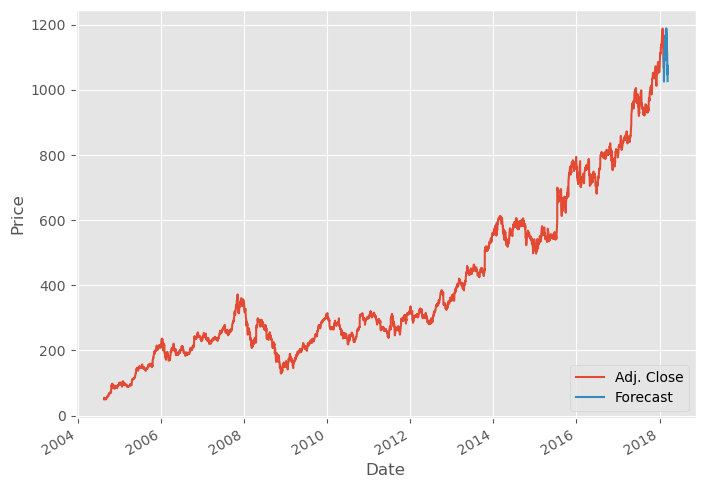

In [30]:
style.use('ggplot')
"""mpld3 activates zoom option in matplotlib."""
# mpld3.enable_notebook()
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()